<a href="https://colab.research.google.com/github/DonRoboto/Financial_Models/blob/master/IPC_PreProc_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar librerias

In [0]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV,SelectPercentile,mutual_info_classif, f_regression, mutual_info_regression

Leer datos de las 35 acciones del S&P/IPC

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/DonRoboto/Financial_Models/master/DATOS_2017_2019.csv", na_values=["?"])
data.columns
rows, cols = data.shape
print(rows)

753


Sustituir datos Nan

In [3]:
data_inter = data.interpolate(method='pad')
data_inter.head(5)

,FECHA,IPC,AC,ALFAA,ALPEKA,ALSEA,AMXL,ASURB,BBAJIOO,BIMBOA,BOLSAA,BSMXB,CEMEXCPO,CUERVO,ELEKTRA,FEMSAUBD,GAPB,GCARSOA1,GCC,GENTERA,GFINBURO,GFNORTEO,GMEXICOB,GRUMAB,IENOVA,KIMBERA,KOFUBL,LABB,LIVEPOLC,MEGACPO,OMAB,ORBIA,PE&OLES,PINFRA,RA,TLEVICPO,WALMEX
0,02/01/2017,45695.10156,99.911522,25.536209,24.551247,58.077705,12.140015,285.105438,285.105438,45.850071,45.850071,45.850071,15.502251,15.502251,257.427063,155.133850,140.042267,79.752678,66.993721,29.452826,29.372025,90.457375,48.839161,241.859055,89.911034,31.570374,31.570374,21.520000,145.570206,64.725891,71.019760,44.208355,347.102417,162.801025,107.274452,84.905945,34.945587
1,03/01/2017,46123.35938,98.839096,25.615704,24.422392,58.214748,12.587231,285.410889,285.410889,45.294140,45.294140,45.294140,15.502251,15.502251,259.420837,158.695633,137.873642,77.301819,66.993721,29.294001,28.398260,89.502396,49.704636,237.878632,90.707314,30.868612,30.868612,21.500000,142.202240,63.168587,71.520355,43.832912,363.187103,160.024628,108.407867,88.546738,35.539799
2,04/01/2017,46587.73828,99.421532,25.257994,24.224161,58.067913,12.773569,290.317474,290.317474,45.879333,45.879333,45.879333,15.933480,15.933480,260.447083,158.833359,140.765152,76.777344,66.993721,29.249884,28.922594,88.379417,50.163342,244.285873,91.971436,30.682608,30.682608,20.860001,139.019318,62.319996,71.496513,45.268982,368.284912,161.238708,107.748260,91.991257,35.605824
3,05/01/2017,46719.98828,99.060974,25.665380,24.739565,57.705723,12.559278,292.780304,292.780304,46.123165,46.123165,46.123165,15.952197,15.952197,261.932648,160.358444,140.379089,76.271896,66.993721,29.435177,29.091129,88.547424,51.487537,252.731445,91.951523,29.904762,29.904762,21.000000,141.180222,61.014477,70.582748,47.897083,393.747162,159.883453,107.404518,90.558495,35.285137
4,06/01/2017,46071.57031,97.091782,25.715063,25.175680,56.452740,12.540645,288.370087,288.370087,46.445026,46.445026,46.445026,15.952197,15.952197,261.356018,157.485413,136.411423,77.959839,66.993721,29.461645,28.136095,86.115776,50.371059,252.943329,91.652924,29.803303,29.803303,20.870001,140.518295,61.266254,70.455605,47.380844,400.292511,156.523529,109.197540,87.948120,34.455124


Correlacion

In [35]:
corrMatrix = data_inter.corr()
print(corrMatrix.iloc[:,2])

IPC         0.713083
AC          0.574865
ALFAA       1.000000
ALPEKA      0.192667
ALSEA       0.702412
AMXL       -0.088905
ASURB       0.376852
BBAJIOO     0.528641
BIMBOA      0.685394
BOLSAA      0.576151
BSMXB       0.653162
CEMEXCPO    0.837981
CUERVO     -0.208021
ELEKTRA    -0.792113
FEMSAUBD   -0.356552
GAPB       -0.609903
GCARSOA1    0.574382
GCC        -0.286593
GENTERA     0.550226
GFINBURO    0.672988
GFNORTEO   -0.030990
GMEXICOB    0.177821
GRUMAB      0.764675
IENOVA      0.413428
KIMBERA    -0.548780
KOFUBL     -0.797117
LABB        0.336373
LIVEPOLC    0.862753
MEGACPO    -0.293334
OMAB       -0.653810
ORBIA       0.581789
PE&OLES     0.744370
PINFRA      0.201587
RA          0.423629
TLEVICPO    0.812232
WALMEX     -0.713972
Name: ALFAA, dtype: float64


Graficamente

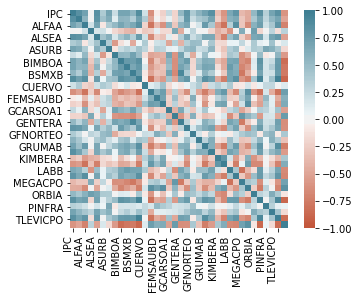

In [5]:
ax = sns.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

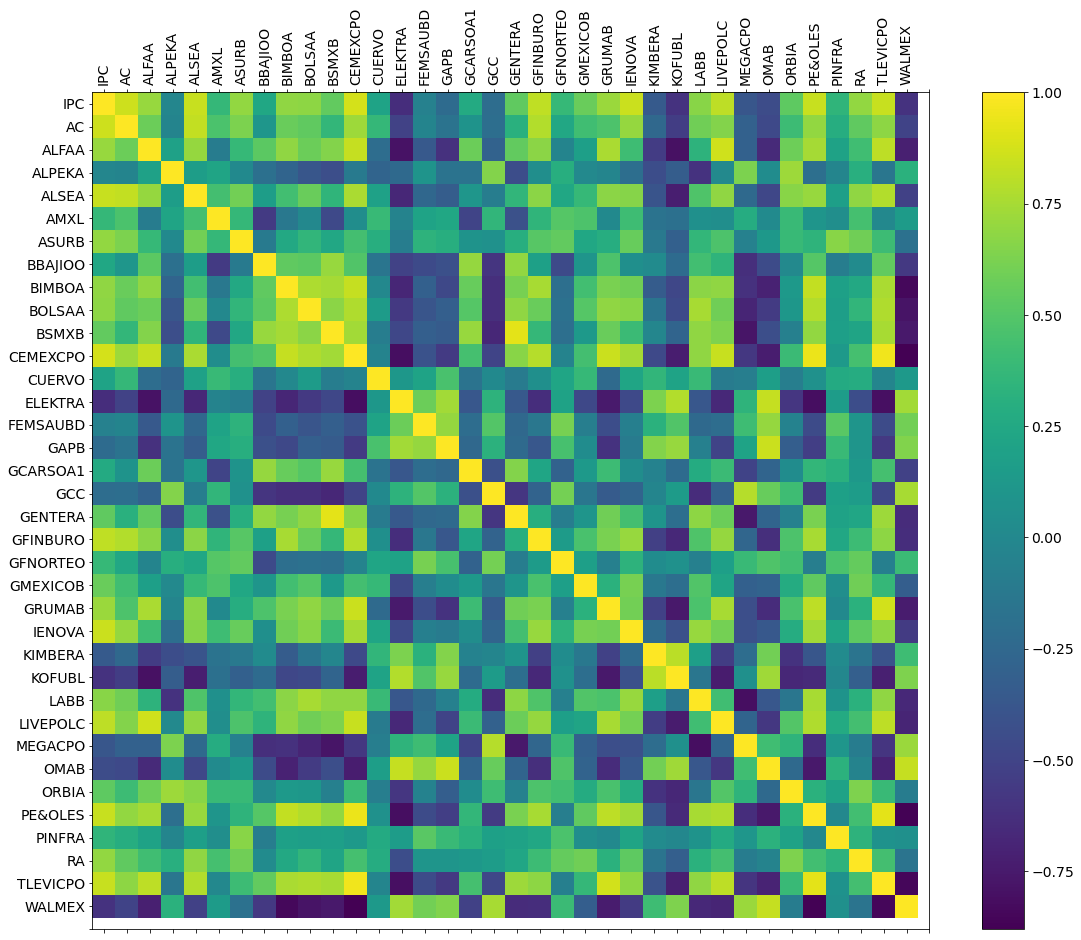

In [6]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corrMatrix, fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns[1:], fontsize=14, rotation=90)
plt.yticks(range(data.shape[1]), data.columns[1:], fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title(' ', fontsize=16);

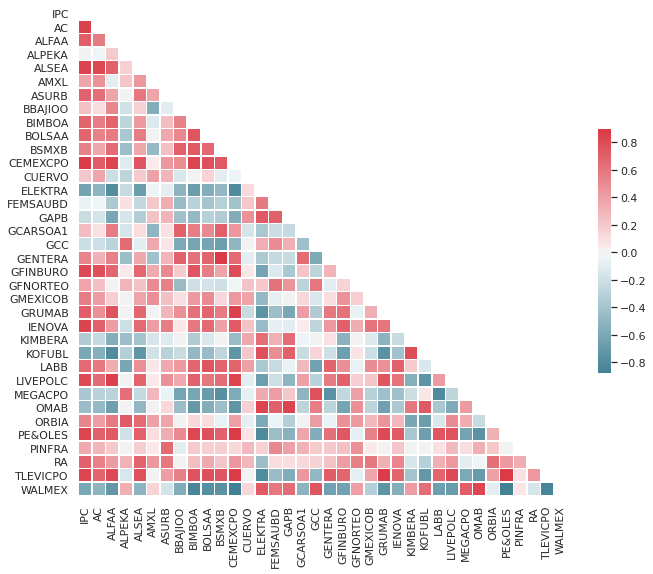

In [13]:
sns.set(style="white")

mask = np.triu(np.ones_like(corrMatrix, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatrix, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##Estandarizacion de los datos


Definimos los datos que consideramos features para entrenamiento

In [8]:
rows_test = int(rows * 0.90)
rows_train = int(rows - rows_test)

X_train = data_inter.iloc[:rows_test,2:]
y_train = data_inter.iloc[:rows_test,1]

X_test = data_inter.iloc[rows_test:,2:]
y_test = data_inter.iloc[rows_test:,1]

print(rows_train, " ", rows_test)


76   677


In [0]:
#Initialize and fit scaler
scaler = StandardScaler()
#Fit scaler using the training data
scaler.fit(X_train)

#Transform the raw data
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)


In [25]:
#Initialize and fit selector
MI_selector = SelectPercentile(mutual_info_regression, percentile=60)#Remove the lower 40%
MI_selector.fit(X_train_standardized,  y_train.values.ravel())

#Transform
X_train_MI = MI_selector.transform(X_train_standardized)
X_test_MI = MI_selector.transform(X_test_standardized)

#Summary
print("Feature Selection Results - Univariate Feature Selection")
#Summary
print("Filter Result:")
print("Number of features: ",X_train_MI.shape[1])

Feature Selection Results - Univariate Feature Selection
Filter Result:
Number of features:  21


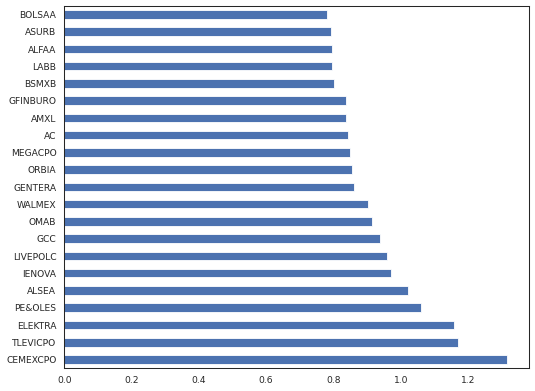

CEMEXCPO    1.316338
TLEVICPO    1.168986
ELEKTRA     1.159124
PE&OLES     1.059041
ALSEA       1.021335
IENOVA      0.971414
LIVEPOLC    0.959852
GCC         0.937874
OMAB        0.916100
WALMEX      0.901866
GENTERA     0.860745
ORBIA       0.856029
MEGACPO     0.848266
AC          0.843753
AMXL        0.838751
GFINBURO    0.837363
BSMXB       0.801889
LABB        0.795360
ALFAA       0.794987
ASURB       0.792921
BOLSAA      0.781038
dtype: float64


In [30]:
#Rank the features by scores
plt.figure(figsize=(10, 8), dpi= 60)
feat_scores = pd.Series(MI_selector.scores_, index=X_train.columns)
top_feat = feat_scores.nlargest(21)
top_feat.plot(kind='barh')
#plt.title(" ")
plt.show()
print(top_feat)